<img title="GitHub Octocat" src='./img/Octocat.jpg' style='height: 60px; padding-right: 15px' alt="Octocat" align="left" height="60"> This notebook is part of a GitHub repository: https://github.com/pessini/moby-bikes
<br>MIT Licensed
<br>Author: Leandro Pessini

# Data Wrangling

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

%matplotlib inline
import warnings
warnings.simplefilter('ignore', FutureWarning)

Dataset provided by [Moby Bikes](https://data.gov.ie/dataset/moby-bikes) through a public [API](https://data.smartdublin.ie/mobybikes-api). 


Dataset provided by [Met Éireann](https://www.met.ie/) through a public [API](https://data.gov.ie/organization/meteireann).


[Met Éireann Weather Forecast API](https://data.gov.ie/dataset/met-eireann-weather-forecast-api/resource/5d156b15-38b8-4de9-921b-0ffc8704c88e)

<a id="1.1"></a>
## Rentals Data - Moby Bikes

### Data fields

- `HarvestTime` - Data retrieval timestamp
- `BikeID` - Unique bike ID used for rent bike
- `Battery` - Battery status (max distance in km)
- `BikeIdentifier` - Bike Identifier (Generally contains only digits, might contains chars)
- `BikeTypeName` - Bike type name
- `EBikeProfileID` - E-bike Profile ID (Every ebike profile has defined Geofence (allowed riding areas))
- `EBikeStateID` - EBike State (Indicates: {1:'Warning - is in move and not rented',2:'Normal',3:'Switched Off',4:'Firmware Upgrade',5:'Laying on the ground'})
- `IsEBike` - Is electronic bike (Bike sends messages to Backend if bike is equipped with electronic, bluetooth etc.)
- `IsMotor` - Bike has *engine*
- `IsSmartLock` - Bike has *smart lock*
- `LastGPSTime` - Last valid GPS message
- `LastRentalStart` - Last time bike was rented
- `Latitude` - Bike coordinates if bike is locked out of station
- `Longitude` - Bike coordinates if bike is locked out of station
- `SpikeID` - Might be used for rent bike instead of BikeID

In [130]:
date_columns = ['HarvestTime','LastGPSTime', 'LastRentalStart']
historical_data = pd.read_csv('../data/raw/historical_data.csv', parse_dates=date_columns)

In [131]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667841 entries, 0 to 1667840
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   HarvestTime      1667841 non-null  datetime64[ns]
 1   BikeID           1667841 non-null  int64         
 2   Battery          1625500 non-null  float64       
 3   BikeIdentifier   1667841 non-null  int64         
 4   BikeTypeName     1667841 non-null  object        
 5   EBikeProfileID   1667841 non-null  int64         
 6   EBikeStateID     1667841 non-null  int64         
 7   IsEBike          1667841 non-null  bool          
 8   IsMotor          1667841 non-null  bool          
 9   IsSmartLock      1667841 non-null  bool          
 10  LastGPSTime      1667841 non-null  datetime64[ns]
 11  LastRentalStart  1667841 non-null  datetime64[ns]
 12  Latitude         1667841 non-null  float64       
 13  Longitude        1667841 non-null  float64       
 14  Sp

In [132]:
historical_data.columns = historical_data.columns.str.lower()
historical_data.head()

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
0,2021-04-01 00:00:03,5,7.0,1,DUB-General,1,2,True,False,False,2021-03-31 23:41:40,2021-03-30 19:18:18,53.3091,-6.21643,1
1,2021-04-01 00:00:03,6,16.0,2,DUB-General,1,2,True,False,False,2021-03-31 23:55:41,2021-03-31 10:31:13,53.3657,-6.32249,2
2,2021-04-01 00:00:03,7,66.0,3,DUB-General,4,2,True,False,False,2021-03-31 23:42:04,2021-03-30 13:07:19,53.2799,-6.14497,3
3,2021-04-01 00:00:03,8,48.0,4,DUB-General,1,2,True,False,False,2021-03-31 23:52:26,2021-03-30 12:43:17,53.2891,-6.11378,4
4,2021-04-01 00:00:03,9,-6.0,5,DUB-General,1,2,True,False,False,2021-03-31 23:50:20,2021-03-29 22:37:58,53.2928,-6.13014,5


In [133]:
print(f'Total number of rows: {historical_data.shape[0]}')
print(f'Total number of columns: {historical_data.shape[1]}')

Total number of rows: 1667841
Total number of columns: 15


In [134]:
historical_data.isnull().sum()

harvesttime            0
bikeid                 0
battery            42341
bikeidentifier         0
biketypename           0
ebikeprofileid         0
ebikestateid           0
isebike                0
ismotor                0
issmartlock            0
lastgpstime            0
lastrentalstart        0
latitude               0
longitude              0
spikeid                0
dtype: int64

In [135]:
historical_data['isebike'].value_counts()

True    1667841
Name: isebike, dtype: int64

In [136]:
historical_data['ismotor'].value_counts()

False    1667841
Name: ismotor, dtype: int64

In [137]:
historical_data['issmartlock'].value_counts()

False    1667841
Name: issmartlock, dtype: int64

`isebike`, `ismotor` and `issmartlock` only have one value. For that reason they will not be used further on the analysis.

In [138]:
historical_data['biketypename'].value_counts()

DUB-General    1652723
Workshop         13200
Private           1918
Name: biketypename, dtype: int64

EBike State indicates: 
- **1:** Warning - is in move and not rented
- **2:** Normal 
- **3:** Switched Off
- **4:** Firmware Upgrade 
- **5:** Laying on the ground

On all states a bike can report, the number **1** is the most alarming because can indicate that a rental is over, a failure in the signal or the rental didn't start at all.

In [139]:
historical_data['ebikestateid'].value_counts()

2    1626825
5      30618
1      10398
Name: ebikestateid, dtype: int64

In [140]:
idx_state1 = historical_data[historical_data['ebikestateid'] == 1]['lastrentalstart'].tolist()
idx_state5 = historical_data[historical_data['ebikestateid'] == 5]['lastrentalstart'].tolist()
nrented_df = historical_data[historical_data['lastrentalstart'].isin(idx_state1)]

In [141]:
nrented_df.sort_values(by=['lastrentalstart','lastgpstime'], ascending=False).head(30)

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
820314,2022-02-28 00:30:03,76,52.0,73,DUB-General,1,2,True,False,False,2022-02-28 00:14:12,2022-02-27 16:30:06,53.3632,-6.23577,73
820253,2022-02-28 00:00:03,76,52.0,73,DUB-General,1,2,True,False,False,2022-02-27 23:44:12,2022-02-27 16:30:06,53.3632,-6.23580,73
820192,2022-02-27 23:30:02,76,52.0,73,DUB-General,1,2,True,False,False,2022-02-27 23:14:12,2022-02-27 16:30:06,53.3632,-6.23580,73
820131,2022-02-27 23:00:05,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 22:44:12,2022-02-27 16:30:06,53.3632,-6.23581,73
820071,2022-02-27 22:30:02,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 22:14:12,2022-02-27 16:30:06,53.3632,-6.23578,73
820012,2022-02-27 22:00:03,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 21:44:12,2022-02-27 16:30:06,53.3632,-6.23577,73
819952,2022-02-27 21:30:03,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 21:14:12,2022-02-27 16:30:06,53.3632,-6.23577,73
819891,2022-02-27 21:00:03,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 20:44:13,2022-02-27 16:30:06,53.3632,-6.23580,73
819830,2022-02-27 20:30:02,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 20:14:12,2022-02-27 16:30:06,53.3632,-6.23580,73
819769,2022-02-27 20:00:04,76,53.0,73,DUB-General,1,2,True,False,False,2022-02-27 19:44:13,2022-02-27 16:30:06,53.3632,-6.23579,73


In [142]:
# 2021-03-31 08:52:13
historical_data[historical_data['lastrentalstart'] == '2021-04-02 12:51:50']

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
4159,2021-04-02 18:30:02,48,33.0,45,DUB-General,1,1,True,False,False,2021-04-02 18:27:14,2021-04-02 12:51:50,0.0,0.0,45


In [143]:
# 2021-04-02 13:00:13
nrented_df[nrented_df['lastrentalstart'] == '2021-04-02 13:00:13']

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
3949,2021-04-02 16:00:03,16,16.0,14,DUB-General,1,1,True,False,False,2021-04-02 15:53:07,2021-04-02 13:00:13,0.0000,0.00000,14
3991,2021-04-02 16:30:03,16,16.0,14,DUB-General,1,2,True,False,False,2021-04-02 16:22:57,2021-04-02 13:00:13,53.3433,-6.23877,14
4032,2021-04-02 17:00:02,16,16.0,14,DUB-General,1,2,True,False,False,2021-04-02 16:52:57,2021-04-02 13:00:13,53.3432,-6.23865,14
4068,2021-04-02 17:30:03,16,16.0,14,DUB-General,1,2,True,False,False,2021-04-02 17:22:57,2021-04-02 13:00:13,53.3432,-6.23817,14
4105,2021-04-02 18:00:03,16,16.0,14,DUB-General,1,2,True,False,False,2021-04-02 17:52:57,2021-04-02 13:00:13,53.3432,-6.23846,14
4147,2021-04-02 18:30:02,16,15.0,14,DUB-General,1,2,True,False,False,2021-04-02 18:22:57,2021-04-02 13:00:13,53.3433,-6.23877,14
4192,2021-04-02 19:00:03,16,15.0,14,DUB-General,1,2,True,False,False,2021-04-02 18:52:57,2021-04-02 13:00:13,53.3433,-6.23875,14


In [144]:
bikenotparked_df = historical_data[historical_data['lastrentalstart'].isin(idx_state5)]
bikenotparked_df.sort_values(by=['lastrentalstart','lastgpstime'], ascending=False).head()

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
818900,2022-02-27 12:30:02,93,35.0,91,DUB-General,1,2,True,False,False,2022-02-27 12:26:41,2022-02-27 11:15:57,53.3631,-6.23583,91
818841,2022-02-27 12:00:02,93,35.0,91,DUB-General,1,2,True,False,False,2022-02-27 11:56:41,2022-02-27 11:15:57,53.3631,-6.23583,91
818782,2022-02-27 11:30:02,93,35.0,91,DUB-General,1,5,True,False,False,2022-02-27 11:26:53,2022-02-27 11:15:57,53.3631,-6.23586,91
820325,2022-02-28 00:30:03,95,33.0,93,DUB-General,1,2,True,False,False,2022-02-28 00:19:52,2022-02-26 16:42:24,53.3410,-6.25000,93
820264,2022-02-28 00:00:03,95,33.0,93,DUB-General,1,2,True,False,False,2022-02-27 23:49:52,2022-02-26 16:42:24,53.3410,-6.25001,93


We have values with `ebikestateid` == 1 (Warning - is in move and not rented) with only one row and others 'within' a rental that could be due to malfunctioning.

If the `ebikestateid` == 5 is present, only a fine will applied to the customer according to the Terms of Services which will not impact the analysis of the rental.

When `ebikestateid` == 1, only rows with one `lastrentalstart` will be removed. The logic is that if a bike has state 1 and only one row, the rental didn't start at all.

In [145]:
# filter out the ones with bike state id 1 and only 1 row
not_rented_list = nrented_df.groupby('lastrentalstart').filter(lambda x: len(x) == 1).index.tolist()
len(not_rented_list)

100

In [146]:
historical_data_clean = historical_data[~historical_data.index.isin(not_rented_list)]
historical_data.shape[0] - historical_data_clean.shape[0]

100

**Sanity check**

In [147]:
assert (historical_data.shape[0] - historical_data_clean.shape[0]) == len(not_rented_list), \
    f"Bike state id logic is wrong. Expected {len(not_rented_list)} rows to be removed, but got {historical_data.shape[0] - historical_data_clean.shape[0]}"

In [148]:
workshop_df = historical_data_clean[historical_data_clean['biketypename'] == 'Workshop']
private_df = historical_data_clean[historical_data_clean['biketypename'] == 'Private']

In [149]:
date_range = str(workshop_df['lastrentalstart'].dt.date.min()) + ' to ' +str(workshop_df['lastrentalstart'].dt.date.max())
date_range

'2020-09-16 to 2022-02-19'

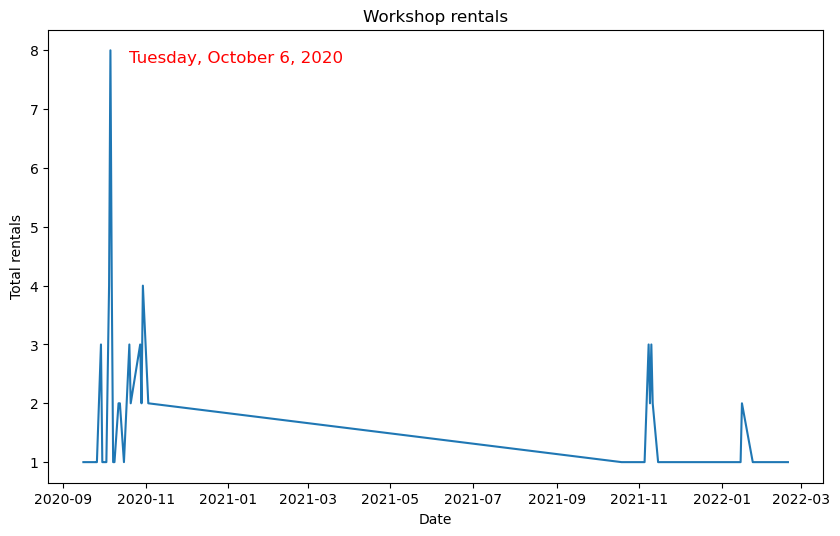

In [150]:
workshop_rentals_dt = workshop_df['lastrentalstart'].drop_duplicates()
workshop_rentals_dt = workshop_rentals_dt.groupby(workshop_rentals_dt.dt.date).count()
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.lineplot(x=workshop_rentals_dt.index, y=workshop_rentals_dt.values, ax=ax, ci=None)
ax.set(xlabel='Date', ylabel='Total rentals', title='Workshop rentals')
ax.text(datetime(2020,10,20), 7.8, "Tuesday, October 6, 2020", fontsize=12, color='red')
plt.show()

In [151]:
workshop_df['bikeid'].value_counts()

117    5559
48     1917
50     1767
31     1633
23      712
94      533
52      532
95      352
58      195
Name: bikeid, dtype: int64

In [152]:
private_df['bikeid'].value_counts()

83    1918
Name: bikeid, dtype: int64

Moby has one bike with **ID 83** which seems to be *`Private`* and also a different bike type called *`Workshop`*. Workshop is unknown if bikes were allocated either to an specific event or the workshop is provided by Moby Bikes in order to promote its services, for example.

In [153]:
general_hist_data = historical_data_clean[historical_data_clean['biketypename'] == 'DUB-General']

In [154]:
print(f'Private BIKE ID 83: {general_hist_data[general_hist_data["bikeid"] == 83].shape[0]} observations')
print(f'Workshop BIKE ID 58: {general_hist_data[general_hist_data["bikeid"] == 58].shape[0]} observations')

Private BIKE ID 83: 18667 observations
Workshop BIKE ID 58: 16271 observations


We can see that the same bike used as *`Private`* and *`Workshop`* are being used again from regular customers. Also, workshop day do not have a big impact overall as shown the maximum number of rentals was 8 on a Workshop day. 

Due to the fact that workshop day (in advance) is unknown and its volume on rentals is not significant high, it is not worthy to label a rental as workshop (true/false). For the reasons discussed above, the data from *`Private`* and *`Workshop`* will be removed.

## Battery

In [158]:
battery_hist_df = general_hist_data.copy()
battery_hist_df.isnull().sum()

harvesttime            0
bikeid                 0
battery            40583
bikeidentifier         0
biketypename           0
ebikeprofileid         0
ebikestateid           0
isebike                0
ismotor                0
issmartlock            0
lastgpstime            0
lastrentalstart        0
latitude               0
longitude              0
spikeid                0
dtype: int64

In [159]:
battery_hist_df[['battery']] = battery_hist_df[['battery']].apply(pd.to_numeric)

In [160]:
battery_hist_df.loc[battery_hist_df['battery'] > 100]

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
5908,2021-04-03 13:00:02,103,268.0,102,DUB-General,1,2,True,False,False,2021-04-03 12:55:11,2021-04-03 12:40:00,53.3405,-6.2679,102


From the battery records there is a few cases that we can consider. Only one record has ` battery > 100` and a few negatives ones. To simplify the analysis the records will be normalized with values between `0 > x > 100`.

All missing values will not be transformed as it could be only malfunction issue when transmiting the data and it could mislead the analysis.

In [162]:
battery_hist_df.loc[battery_hist_df['battery'] > 100, 'battery'] = 100

In [171]:
negatives_b = battery_hist_df.loc[battery_hist_df['battery'] < 0]
negatives_b.shape[0]

28746

In [172]:
idx_neg_battery = negatives_b['lastrentalstart'].tolist()
negbattery_hist_df = battery_hist_df[battery_hist_df['lastrentalstart'].isin(idx_neg_battery)]
negbattery_hist_df.sort_values(by=['lastrentalstart','lastgpstime'], ascending=False).head(3)

,harvesttime,bikeid,battery,bikeidentifier,biketypename,ebikeprofileid,ebikestateid,isebike,ismotor,issmartlock,lastgpstime,lastrentalstart,latitude,longitude,spikeid
813372,2022-02-25 15:00:02,35,84.0,31,DUB-General,1,2,True,False,False,2022-02-25 14:53:14,2022-02-25 09:35:11,53.3769,-6.26973,31
813308,2022-02-25 14:30:03,35,-12.0,31,DUB-General,1,1,True,False,False,2022-02-25 14:23:58,2022-02-25 09:35:11,0.0000,0.00000,31
812067,2022-02-25 05:00:02,12,40.0,8,DUB-General,1,2,True,False,False,2022-02-25 04:43:46,2022-02-24 23:13:45,53.3608,-6.27240,8


There are lots of negative/missing battery information as well as Latitude/Longitude. Because we are not using this information for modeling, this data won't be handled for now. When grouping the data all the historical info for these two features will be stored as lists.

In [ ]:
# normalize battery status between 0 > x < 100
# battery_hist_df['battery'] = abs(battery_hist_df['battery'])

In [173]:
rentals = battery_hist_df.copy()
rentals.to_csv('../data/interim/rentals.csv', index=False)
rentals.shape

(1652623, 15)

<a id="1.2"></a>
## Weather Data - Met Éireann

Regarding the weather data there are two important decisions to deal with.

- One is about from **which station** the **historical data will be collected**;
-  and the other one is about the **frequency of data**, which can be **hourly or daily**.

### Station Name: **PHOENIX PARK**

In [ ]:
# Hourly data from Phoenix Park Station
phoenixpark_weather_hourly = pd.read_csv('../data/raw/hly175.csv')
phoenixpark_weather_hourly.head()

Source: [https://data.gov.ie/dataset/phoenix-park-hourly-data](https://data.gov.ie/dataset/phoenix-park-hourly-data)

In [ ]:
# Daily data from Phoenix Park Station
phoenixpark_weather_daily = pd.read_csv('../data/raw/dly175.csv')
phoenixpark_weather_daily.head()

Source: [https://data.gov.ie/dataset/phoenixpark-daily-data](https://data.gov.ie/dataset/phoenixpark-daily-data)

### Station Name: **DUBLIN AIRPORT**

In [ ]:
# Hourly data from Dublin Airport Station
dublin_airport_weather_hourly = pd.read_csv('../data/raw/hly532.csv')
dublin_airport_weather_hourly.head()

In [ ]:
print(f'Total number of rows: {dublin_airport_weather_hourly.shape[0]}')

Source: [https://data.gov.ie/dataset/dublin-airport-hourly-data](https://data.gov.ie/dataset/dublin-airport-hourly-data)

### Phoenix Park Station vs Dublin Aiport Station
Geographically, the station at Phoenix Park would be the most suitable choice but unfortunately, they do not collect Wind information which in Ireland plays an important role when deciding to go cycling or not. For those who are not familiar with Irish weather, it rains a lot and mostly we do not have much choice about it but the wind is something that can prevent you go outside or choosing a different kind of transportation. Heavy rain is not that common, though.

### Hourly vs Daily data
A daily data to the business could make more sense but because the weather is so unpredictable in Ireland (it can completely change in an hour), the best option would be hourly data if looking at a historical perspective. Important to note that from the Weather API the forecast is provided hourly. For simplicity and better planning, we can always aggregate the predicted results by day.

In [ ]:
# transforming date columns in weather data to datetime
dublin_airport_weather_hourly['date'] = pd.to_datetime(dublin_airport_weather_hourly['date'])
dublin_airport_weather_hourly.info()

In [ ]:
dublin_airport_weather_hourly.tail()

### Sampling

In [ ]:
start_date_hist = datetime(2021, 3, 1) # first day
end_date_hist = datetime(2022, 3, 1) # last day used as historical data

In [ ]:
recent_dubairport_data = dublin_airport_weather_hourly.copy()
recent_dubairport_data = recent_dubairport_data[(recent_dubairport_data.date >= start_date_hist) & (recent_dubairport_data.date <= end_date_hist)]
len(dublin_airport_weather_hourly), len(recent_dubairport_data)

In [ ]:
columns_to_drop = ['ind','ind.1','ind.2','ind.3','vappr','msl','ind.4','wddir','ww','w','sun','vis','clht','clamt','wetb','dewpt']
weather_data = recent_dubairport_data.drop(columns=columns_to_drop)
weather_data.to_csv('../data/interim/hist_weather_data.csv', index=False)

In [ ]:
weather_data.head()

In [ ]:
weather_data = weather_data[:-1] # drop the last row from 01/03/2022
weather_data.tail()

<img title="GitHub Mark" src="./img/GitHub-Mark-64px.png" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/moby-bikes) <br>Author: Leandro Pessini